In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate sample data (for demonstration purposes)
X, y = make_blobs(n_samples=300, centers=4, random_state=42)

# K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

# Get cluster centers and labels
centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Plot the data points and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.title("K-means Clustering")
plt.legend()
plt.show()


In [2]:
# Import necessary libraries
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np

# Generate sample data (for demonstration purposes)
X, y = make_blobs(n_samples=300, centers=4, random_state=42)

# K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

# Get labels and cluster centers
labels = kmeans.labels_

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(X, labels)

# Calculate Silhouette Score
sil_score = silhouette_score(X, labels)

# Get Inertia (sum of squared distances of samples to their closest cluster center)
inertia = kmeans.inertia_

# Output the metrics
print(f"Davies-Bouldin Index: {db_index:.3f}")
print(f"Silhouette Score: {sil_score:.3f}")
print(f"Inertia: {inertia:.3f}")


Davies-Bouldin Index: 0.291
Silhouette Score: 0.792
Inertia: 564.914


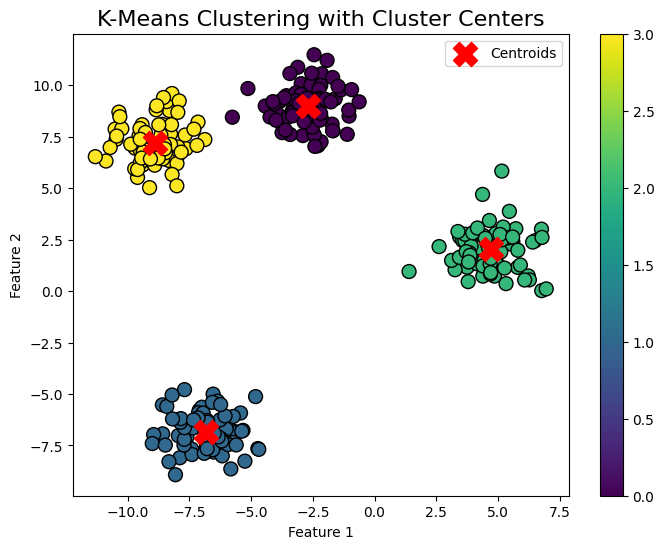

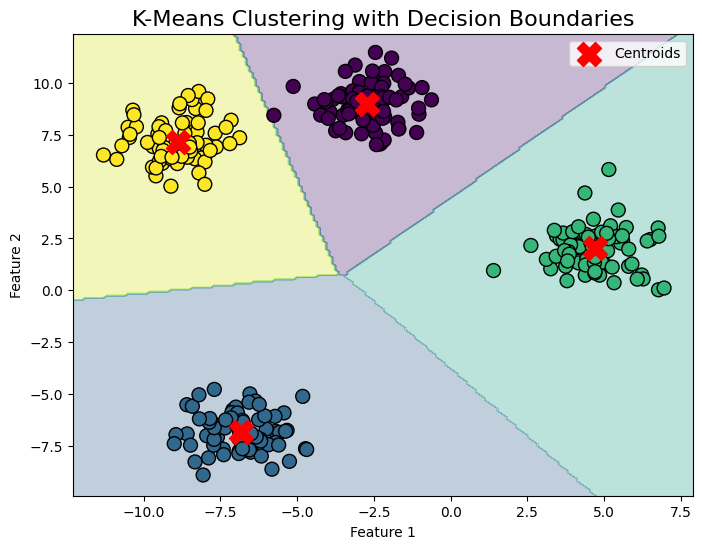

In [3]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap

# Generate sample data (for demonstration purposes)
X, y = make_blobs(n_samples=300, centers=4, random_state=42)

# Perform K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Set up the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Create a scatter plot of the data points, colored by their cluster label
scatter = ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolor='k', s=100)

# Mark the centroids with a different color and larger marker size
ax.scatter(centers[:, 0], centers[:, 1], s=300, c='red', marker='X', label='Centroids')

# Add a title and labels
ax.set_title("K-Means Clustering with Cluster Centers", fontsize=16)
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.legend(loc='best')

# Show colorbar for reference
plt.colorbar(scatter)

# Display the plot
plt.show()

# --- Optional: Plot Decision Boundaries ---
# Create a mesh grid for plotting decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict labels for each point in the mesh grid
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
fig, ax = plt.subplots(figsize=(8, 6))
ax.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolor='k', s=100)
ax.scatter(centers[:, 0], centers[:, 1], s=300, c='red', marker='X', label='Centroids')

# Add titles and labels
ax.set_title("K-Means Clustering with Decision Boundaries", fontsize=16)
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.legend(loc='best')

# Display the plot
plt.show()


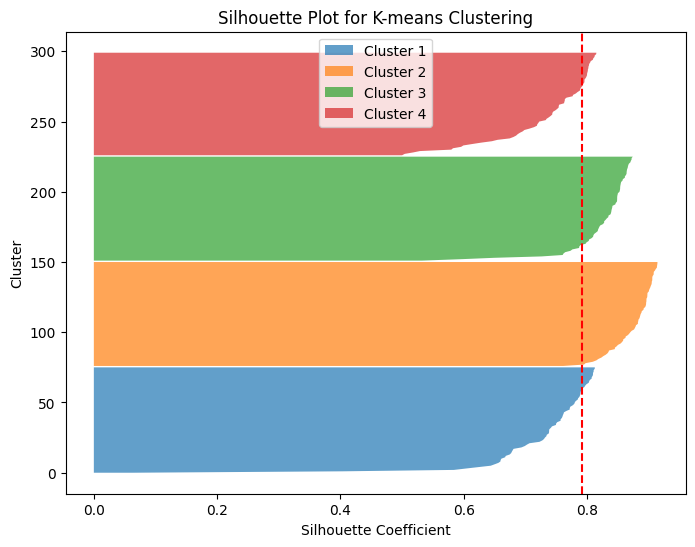

In [4]:
from sklearn.metrics import silhouette_samples, silhouette_score
import seaborn as sns

# Calculate silhouette score
silhouette_avg = silhouette_score(X, labels)
sample_silhouette_values = silhouette_samples(X, labels)

# Plot Silhouette Score
fig, ax = plt.subplots(figsize=(8, 6))

# Create silhouette plot for each sample
y_lower, y_upper = 0, 0
for i in range(4):  # Assuming 4 clusters
    cluster_silhouette_values = sample_silhouette_values[labels == i]
    cluster_silhouette_values.sort()
    
    y_upper += len(cluster_silhouette_values)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values, 
                     alpha=0.7, label=f'Cluster {i+1}')
    y_lower = y_upper

# Draw a vertical line for average silhouette score
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_title("Silhouette Plot for K-means Clustering")
ax.set_xlabel("Silhouette Coefficient")
ax.set_ylabel("Cluster")
ax.legend()
plt.show()


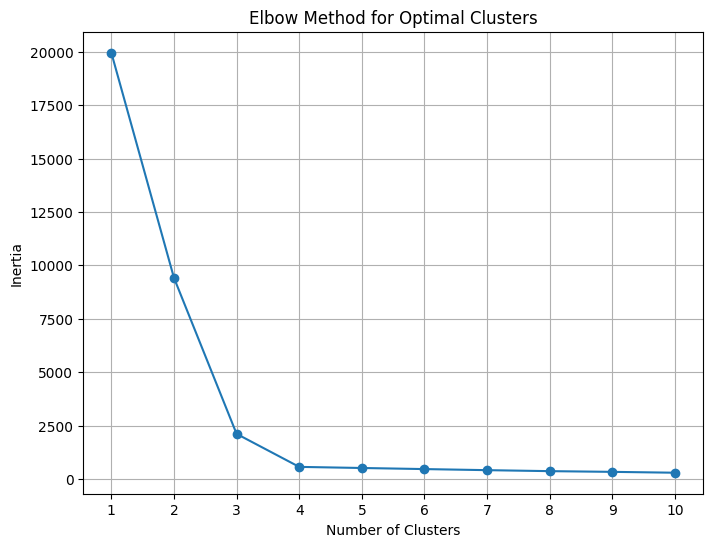

In [5]:
# Elbow Method to find the optimal number of clusters
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.xticks(k_range)
plt.grid(True)
plt.show()


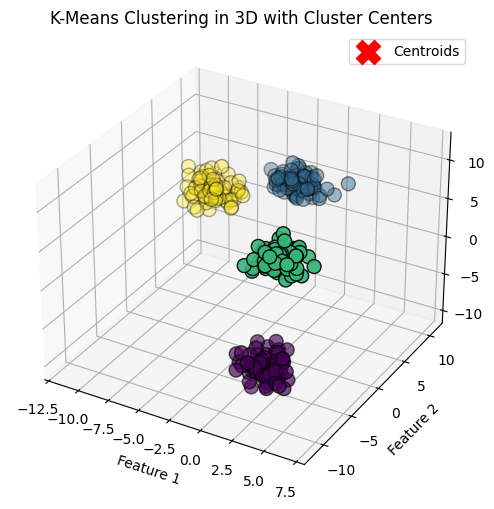

In [6]:
from mpl_toolkits.mplot3d import Axes3D

# If you have 3 features, you can use a 3D scatter plot
X_3D = make_blobs(n_samples=300, centers=4, n_features=3, random_state=42)[0]

# Perform K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_3D)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Create 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with clusters
scatter = ax.scatter(X_3D[:, 0], X_3D[:, 1], X_3D[:, 2], c=labels, cmap='viridis', edgecolor='k', s=100)

# Plot the centroids
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], s=300, c='red', marker='X', label='Centroids')

ax.set_title("K-Means Clustering in 3D with Cluster Centers")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
ax.legend(loc='best')
plt.show()


In [8]:
from sklearn.metrics import davies_bouldin_score

# Calculate Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X, labels)
print(f"Davies-Bouldin Index: {davies_bouldin}")


Davies-Bouldin Index: 31.0888542984412


In [11]:
from sklearn.metrics import calinski_harabasz_score

# Calculate Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(X, labels)
print(f"Calinski-Harabasz Index: {calinski_harabasz}")


Calinski-Harabasz Index: 1.3952091543848406
